InstaCart data anaylsis work

1. Import Libraries and Data

2. Address security restraints

3. Create a regional segmentation of the data
- Determine whether there’s a difference in spending habits between the different U.S. regions
- Calculating the percentages

4. Exclusion flag for customer activity

5. Profiling variables
- Age
- Marital Status
- Income
- Departments
- Parental Status
- Busy time of day

6. Profile Visualizations
- Age
- Marital Status
- Parental Status
- Income
- Departments
- Hours of the Day
- Day of the Week
- Price Range
- Loyalty
- Region

7. Aggregations for frequency and expenditure
- Age
- Marital Status
- Parental Status
- Income
- Departments
- Day of the Week

8. Comparisons
- Department & Parental Status
- Department & Marital Status
- Department & Age
- Department & Income
- Department & Day of Week
- Department & Busy Time of Day
- Department & Loyalty
- Region & Parental
- Region & Marital
- Region & Age
- Region & Income
- Region & Day of Week
- Region & Spending Flag
- Loyalty & Age
- Loyalty & Gender
- Loyalty & Price Range
- Marital Status & Age

9. Final notes

10. Exports

-------------------------------------------------------------------------------------------------------------------

1. Import libraries and data

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Create Path

path = r'/Users/chrisherin/Documents/01_Jupyter/11-2021 Instacart Basket Analysis'

In [3]:
# Import data

df_10 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Insta_full.pkl'))

In [4]:
# Allow all column veiw

pd.options.display.max_columns = None

In [5]:
# Import check

df_10.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,freq_flag,first_name,last_name,gender,state,age,date_joined,num_dep,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# Remove 'prices >100'

df_10.loc[df_10['prices'] >100, 'prices'] = np.nan

In [7]:
# Crosstab

crosstab = pd.crosstab(df_10['days_since_prior_order'], df_10['order_number'], dropna = False)

In [8]:
# Copy crosstab

crosstab.to_clipboard()

:: Crosstab confirms all 'days_since_prior_order' NaN values correlate to new customer orders

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

:: PII data is included in columns:
- 'first_name'
- 'last_name'

:: These should be taken into consideration when sharing data outside org. As this set will be passed up the chain for mentor review removal of PII data not neccesary. If otherwise advised then these columns should be removed and rely 'customer_id' for individual customer records.

3. Create a regional segmentation of the data.

In [9]:
df_10['state'].value_counts()

Pennsylvania            667738
California              660428
Rhode Island            657662
Georgia                 657092
New Mexico              655188
Arizona                 654553
North Carolina          652329
Oklahoma                652275
Alaska                  649026
Minnesota               648424
Massachusetts           647020
Wyoming                 644927
Virginia                642103
Missouri                641323
Texas                   641051
Colorado                639820
Maine                   639175
North Dakota            638997
Alabama                 638650
Louisiana               638179
Kansas                  638021
Delaware                637477
South Carolina          637423
Oregon                  636966
Arkansas                636737
New York                636707
Nevada                  636697
Montana                 635838
South Dakota            634362
Illinois                633476
Hawaii                  633446
Washington              633445
Mississi

In [7]:
# Create column for regions

region = []

for state in df_10['state']:
    if (state == 'Maine') or (state == 'New Hampshire') or (state == 'Vermont') or (state == 'Massachusetts') or (state == 'Rhode Island') or (state == 'Connecticut') or (state == 'New York') or (state == 'Pennsylvania') or (state == 'New Jersey'):
        region.append('Northeast')
    elif (state == 'Wisconsin') or (state == 'Michigan') or (state == 'Illinois') or (state == 'Indiana') or (state == 'Ohio') or (state == 'North Dakota') or (state == 'South Dakota') or (state == 'Nebraska') or (state == 'Kansas') or (state == 'Minnesota') or (state == 'Iowa') or (state == 'Missouri'):
        region.append('Midwest')
    elif (state == 'Delaware') or (state == 'Maryland') or (state == 'District of Columbia') or (state == 'Virginia') or (state == 'West Virginia') or (state == 'North Carolina') or (state == 'South Carolina') or (state == 'Georgia') or (state == 'Florida') or (state == 'Kentucky') or (state == 'Tennessee') or (state == 'Mississippi') or (state == 'Alabama') or (state == 'Oklahoma') or (state == 'Texas') or (state == 'Arkansas') or (state == 'Louisiana'):
        region.append('South')
    elif (state == 'Idaho') or (state == 'Montana') or (state == 'Wyoming') or (state == 'Nevada') or (state == 'Utah') or (state == 'Colorado') or (state == 'Arizona') or (state == 'New Mexico') or (state == 'Alaska') or (state == 'Washington') or (state == 'Oregon') or (state == 'California') or (state == 'Hawaii'):
        region.append('West')
    else:
        region.append('No state')

In [7]:
# Check

region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Wes

In [8]:
# Add column to df_10

df_10['region'] = region

In [9]:
# Value count 'region'

df_10['region'].value_counts(dropna = False)

South        10801982
West          8300617
Midwest       7604016
Northeast     5728444
Name: region, dtype: int64

:: Determine whether there’s a difference in spending habits between the different U.S. regions

In [10]:
# Create crosstab to compare 'region' and 'spending_flag'

crosstab = pd.crosstab(df_10['region'], df_10['spending_flag'], dropna = False)

In [11]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,156084,7447932
Northeast,108258,5620186
South,209863,10592119
West,160440,8140177


In [12]:
crosstab.to_clipboard()

:: Calculating the percentages as:
- Midwest  HS - 2.1%   //   LS - 97.9%
- Northeast HS - 1.9%   //   LS - 98.1%
- South     HS - 1.9%   //   LS - 98.1%
- West      HS - 2%     //   LS - 98%

The resulting percentages show a fairly even spread of high and low spending across the regions.

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [9]:
# Create exclution flags
# 'low activity cust'

df_10.loc[df_10['max_order'] < 5, 'exclusion_flag'] = 'low activity cust'

In [10]:
# 'regular cust'

df_10.loc[df_10['max_order'] >= 5, 'exclusion_flag'] = 'regular cust'

In [15]:
# Check exclusion flag 

df_10['exclusion_flag'].value_counts(dropna = False)

regular cust         30993489
low activity cust     1441570
Name: exclusion_flag, dtype: int64

In [11]:
# Create new df 'low activity cust'

df_10LAC = df_10[df_10['exclusion_flag'] == 'low activity cust']

In [12]:
# Check df_10LAC

df_10LAC.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,freq_flag,first_name,last_name,gender,state,age,date_joined,num_dep,marital_status,income,region,exclusion_flag
360,2717275,5,1,3,12,NaN,15349,1,0,both,Organic Raw Agave Nectar,29.0,13.0,10.7,Mid-range product,regularly busy,regularly busy,Most orders,4,New customer,9.189189,Low spender,11.0,regular customer,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low activity cust
361,2717275,5,1,3,12,NaN,21413,2,0,both,Organic Soba,66.0,6.0,6.7,Mid-range product,regularly busy,regularly busy,Most orders,4,New customer,9.189189,Low spender,11.0,regular customer,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low activity cust
362,2717275,5,1,3,12,NaN,48775,3,0,both,Organic Red Cabbage,83.0,4.0,7.4,Mid-range product,regularly busy,regularly busy,Most orders,4,New customer,9.189189,Low spender,11.0,regular customer,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low activity cust
363,2717275,5,1,3,12,NaN,28289,4,0,both,Organic Shredded Carrots,123.0,4.0,3.2,Low-range product,regularly busy,regularly busy,Most orders,4,New customer,9.189189,Low spender,11.0,regular customer,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low activity cust
364,2717275,5,1,3,12,NaN,8518,5,0,both,Organic Red Onion,83.0,4.0,6.3,Mid-range product,regularly busy,regularly busy,Most orders,4,New customer,9.189189,Low spender,11.0,regular customer,Janet,Lester,Female,California,75,10/8/2018,0,divorced/widowed,115242,West,low activity cust


In [13]:
# Create new df 'regular cust'

df_10RC = df_10[df_10['exclusion_flag'] == 'regular cust']

In [14]:
# Check df_10RC

df_10RC.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,freq_flag,first_name,last_name,gender,state,age,date_joined,num_dep,marital_status,income,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust


In [14]:
df_10RC.shape

(30993489, 34)

In [22]:
# Export new df's

df_10LAC.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity_customers.pkl'))
df_10RC.to_pickle(os.path.join(path,'02 Data','Prepared Data','regular_activity_customers.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

:: Age

In [23]:
# Age range of customers 

df_10RC['age'].value_counts().sort_index()

18    478848
19    496657
20    480636
21    489613
22    491315
       ...  
77    478495
78    471475
79    508850
80    493150
81    486346
Name: age, Length: 64, dtype: int64

In [15]:
# Create age groups 

age_group = []

for value in df_10RC['age']:
    if value <= 20:
        age_group.append('18-20')
    elif (value > 20) and (value <= 30):
        age_group.append('21-30')
    elif (value > 30) and (value <= 40):
        age_group.append('31-40')
    elif (value > 40) and (value <= 50):
        age_group.append('41-50')
    elif (value > 50) and (value <= 60):
        age_group.append('51-60')
    elif (value > 60) and (value <= 70):
        age_group.append('61-70')
    elif (value > 70) and (value <= 80):
        age_group.append('71-80')
    elif (value > 80) and (value <= 90):
        age_group.append('80+')    
    else:
        result.append('No age available')

In [16]:
# Create column for age groups

df_10RC['age_group'] = age_group

<ipython-input-16-5ad396892c3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10RC['age_group'] = age_group


In [31]:
# Check age group

df_10RC['age_group'].value_counts().sort_index()

18-20    1456141
21-30    4854153
31-40    4848504
41-50    4873046
51-60    4839811
61-70    4784532
71-80    4850956
80+       486346
Name: age_group, dtype: int64

In [17]:
df_10RC['age_group'].value_counts().sort_index().to_clipboard()

:: Marital status

In [27]:
# Marital status

df_10RC['marital_status'].value_counts()

married                             21763585
single                               5099384
divorced/widowed                     2647799
living with parents and siblings     1482721
Name: marital_status, dtype: int64

In [18]:
df_10RC['marital_status'].value_counts().to_clipboard()

:: Parental Status

In [19]:
# Dependants

df_10RC['num_dep'].value_counts().sort_index()

0    7747183
1    7726129
2    7740539
3    7779638
Name: num_dep, dtype: int64

In [20]:
# Create 'parent' / 'non-parent' conditions
# Create 'parent' id

df_10RC.loc[df_10RC['num_dep'] >= 1, 'parental_status'] = 'parent'

/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [21]:
# Create 'non-parent' id

df_10RC.loc[df_10RC['num_dep'] == 0, 'parental_status'] = 'non-parent'

/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [22]:
# Check 'parental_status' values

df_10RC['parental_status'].value_counts()

parent        23246306
non-parent     7747183
Name: parental_status, dtype: int64

In [23]:
df_10RC['parental_status'].value_counts().to_clipboard()

:: Income

In [32]:
# Check income range

df_10RC['income'].describe()

count    3.099349e+07
mean     9.967349e+04
std      4.313999e+04
min      2.590300e+04
25%      6.728900e+04
50%      9.676500e+04
75%      1.281010e+05
max      5.939010e+05
Name: income, dtype: float64

- income min is 25,903.00
- income max is 593,901.00

In [24]:
# Create income brackets

income_b = []

for value in df_10RC['income']:
    if value <= 50000: 
        income_b.append('025000-050000')
    elif (value > 50000) and (value <= 75000):
        income_b.append('050000-075000')
    elif (value > 75000) and (value <= 100000):
        income_b.append('075000-100000')
    elif (value > 100000) and (value <= 125000):
        income_b.append('100000-125000')
    elif (value > 125000) and (value <= 150000):
        income_b.append('125000-150000')
    elif (value > 150000):
        income_b.append('150000+')
    else: 
        incomeb.append('no income data')

In [25]:
# Add 'income_b' to df

df_10RC['income_b'] = income_b

<ipython-input-25-0dfe74298063>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10RC['income_b'] = income_b


In [26]:
# Check 'income_b' values

df_10RC['income_b'].value_counts().sort_index()

025000-050000    3366219
050000-075000    6550442
075000-100000    6857382
100000-125000    5933964
125000-150000    4387410
150000+          3898072
Name: income_b, dtype: int64

In [27]:
df_10RC['income_b'].value_counts().sort_index().to_clipboard()

:: Departments

In [28]:
# Import department data 

df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [29]:
# Check import

df_dep.head()

,department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,bulk,personal care,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [30]:
# Transpose

df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [31]:
# Create column for 'dept_name'


df_10RC.loc[df_10RC['department_id'] == 1, 'dept_name'] = 'frozen'
df_10RC.loc[df_10RC['department_id'] == 2, 'dept_name'] = 'other'
df_10RC.loc[df_10RC['department_id'] == 3, 'dept_name'] = 'bakery'
df_10RC.loc[df_10RC['department_id'] == 4, 'dept_name'] = 'produce'
df_10RC.loc[df_10RC['department_id'] == 5, 'dept_name'] = 'alcohol'
df_10RC.loc[df_10RC['department_id'] == 6, 'dept_name'] = 'international'
df_10RC.loc[df_10RC['department_id'] == 7, 'dept_name'] = 'beverages'
df_10RC.loc[df_10RC['department_id'] == 8, 'dept_name'] = 'pets'
df_10RC.loc[df_10RC['department_id'] == 9, 'dept_name'] = 'dry goods pasta'
df_10RC.loc[df_10RC['department_id'] == 10, 'dept_name'] = 'bulk'
df_10RC.loc[df_10RC['department_id'] == 11, 'dept_name'] = 'personal care'
df_10RC.loc[df_10RC['department_id'] == 12, 'dept_name'] = 'meat seafood'
df_10RC.loc[df_10RC['department_id'] == 13, 'dept_name'] = 'pantry'
df_10RC.loc[df_10RC['department_id'] == 14, 'dept_name'] = 'breakfast'
df_10RC.loc[df_10RC['department_id'] == 15, 'dept_name'] = 'canned goods'
df_10RC.loc[df_10RC['department_id'] == 16, 'dept_name'] = 'dairy eggs'
df_10RC.loc[df_10RC['department_id'] == 17, 'dept_name'] = 'households'
df_10RC.loc[df_10RC['department_id'] == 18, 'dept_name'] = 'babies'
df_10RC.loc[df_10RC['department_id'] == 19, 'dept_name'] = 'snacks'
df_10RC.loc[df_10RC['department_id'] == 20, 'dept_name'] = 'deli'
df_10RC.loc[df_10RC['department_id'] == 21, 'dept_name'] = 'missing'

/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
# Check 'dept_name' values

df_10RC['dept_name'].value_counts()

produce            9079276
dairy eggs         5177183
snacks             2766406
beverages          2571901
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
households          699858
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: dept_name, dtype: int64

In [33]:
df_10RC['dept_name'].value_counts().to_clipboard()

:: Busy time of day

In [40]:
# Check hour of day sales

df_10RC['order_hour_of_day'].value_counts().sort_index()

0      208217
1      109706
2       65744
3       48835
4       50803
5       84515
6      281308
7      864083
8     1660909
9     2366074
10    2652367
11    2617288
12    2498043
13    2541577
14    2570258
15    2538299
16    2415879
17    1984111
18    1552568
19    1194931
20     931757
21     763821
22     607557
23     384839
Name: order_hour_of_day, dtype: int64

In [34]:
# Create busy time of day flag (busy_tod)

busy_tod = []

for value in df_10RC['order_hour_of_day']:
    if (value >= 9) and (value <=17): 
        busy_tod.append('busy time')
    elif (value > 17) or (value < 9):
        busy_tod.append('slow time')
    else: 
        busy_tod.append('no data')

In [35]:
# Add 'busy_tod' to df

df_10RC['busy_tod'] = busy_tod

<ipython-input-35-5e1a93d0d089>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_10RC['busy_tod'] = busy_tod


In [36]:
# Check 'busy_tod' values

df_10RC['busy_tod'].value_counts()

busy time    22183896
slow time     8809593
Name: busy_tod, dtype: int64

In [37]:
df_10RC['busy_tod'].value_counts().to_clipboard()

:: final checks

In [31]:
# Check df_10RC for code completion

df_10RC.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busy_days,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,freq_flag,first_name,last_name,gender,state,age,date_joined,num_dep,marital_status,income,region,exclusion_flag,busy_tod
0,2539329,1,1,2,8,NaN,196,1,0,both,Soda,77.0,7.0,9.0,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust,slow time
1,2539329,1,1,2,8,NaN,14084,2,0,both,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Mid-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust,slow time
2,2539329,1,1,2,8,NaN,12427,3,0,both,Original Beef Jerky,23.0,19.0,4.4,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust,slow time
3,2539329,1,1,2,8,NaN,26088,4,0,both,Aged White Cheddar Popcorn,23.0,19.0,4.7,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust,slow time
4,2539329,1,1,2,8,NaN,26405,5,0,both,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Low-range product,regularly busy,regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,regular cust,slow time


In [42]:
# Check df_10RC changes shape

df_10RC.shape

(30993489, 39)

In [43]:
# Save df_10RC version

df_10RC.to_pickle(os.path.join(path,'02 Data','Prepared Data','reg_act_cust_profile.pkl'))

:: Data saved with customer profiling. Still containing PII. If transfering outside confidential arena, must remove PII before sharing. 
- Please adivse on further sharing needs from here

6. Create an appropriate visualization to show the distribution of profiles.

:: Age bar chart

Text(0.5, 0, 'Age Groups')

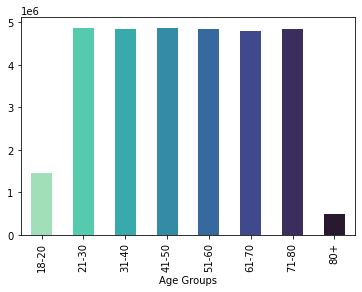

In [44]:
# Create a bar chart for age groups

bar_age = df_10RC['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 8))
plt.xlabel('Age Groups')

In [45]:
# Export bar chart

bar_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age.png'))

:: Marital Status pie chart

Text(108.68, 0.5, '')

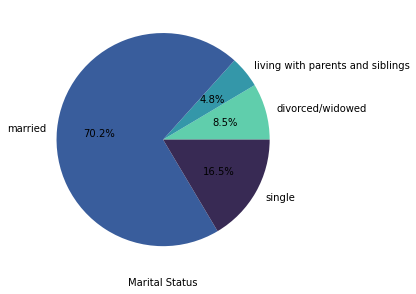

In [133]:
# Create pie chart for marital status

pie_marital_status = df_10RC['marital_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 4))
plt.tight_layout()
plt.xlabel('Marital Status')
plt.ylabel('')

In [134]:
# Export pie chart

pie_marital_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_marital_status.png'))

:: Parental Status pie chart

Text(108.68, 0.5, '')

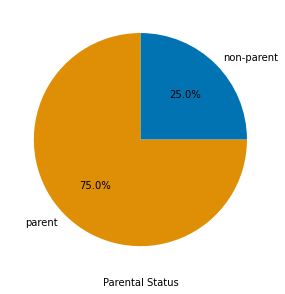

In [48]:
# Create pie chart for parental status

pie_parental_status = df_10RC['parental_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('colorblind', 4))
plt.tight_layout()
plt.xlabel('Parental Status')
plt.ylabel('')

In [49]:
# Export pie chart

pie_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_parental_status.png'))

:: Income charts

Text(0.5, 0, 'Income Histogram')

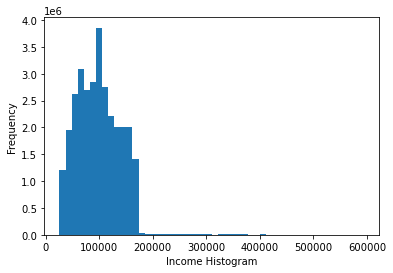

In [50]:
# Create histogram for income

hist_income = df_10RC['income'].plot.hist(bins = 50)
plt.xlabel('Income Histogram')

In [51]:
# Export hist

hist_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_income.png'))

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '025000-050000'),
  Text(1, 0, '050000-075000'),
  Text(2, 0, '075000-100000'),
  Text(3, 0, '100000-125000'),
  Text(4, 0, '125000-150000'),
  Text(5, 0, '150000+')])

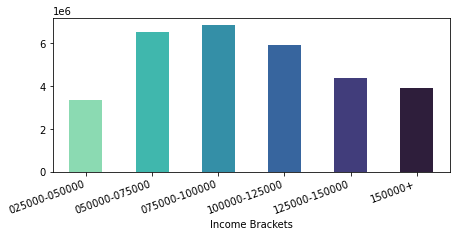

In [52]:
# Create a bar chart for income brackets

bar_incomeb = df_10RC['income_b'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 6))
plt.xlabel('Income Brackets')
plt.tight_layout()
plt.xticks(rotation = 20, horizontalalignment = 'right')

In [53]:
# Export bar chart

bar_incomeb.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_incomeb.png'))

Text(108.68, 0.5, '')

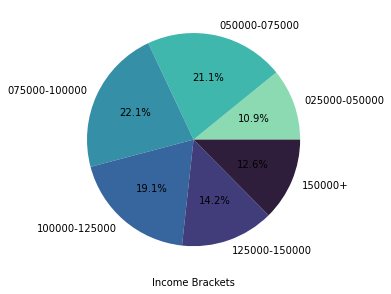

In [54]:
# Create pie chart for income

pie_incomeb = df_10RC['income_b'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 6))
plt.tight_layout()
plt.xlabel('Income Brackets')
plt.ylabel('')

In [55]:
# Export pie chart

pie_incomeb.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_incomeb.png'))

:: Departments

Text(108.68, 0.5, '')

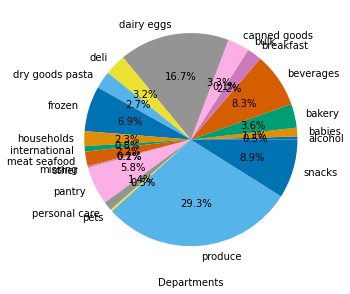

In [56]:
# Create pie chart for departments

pie_dept = df_10RC['dept_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('colorblind'))
plt.tight_layout()
plt.xlabel('Departments')
plt.ylabel('')

In [57]:
# Export pie chart

pie_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_dept.png'))

Text(0.5, 0, 'Departments')

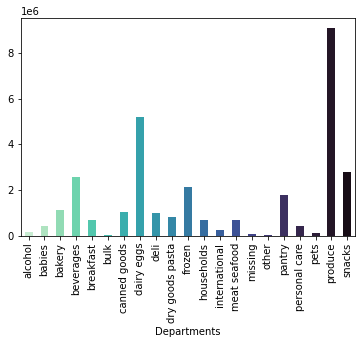

In [58]:
# Create a bar chart for departments

bar_dept = df_10RC['dept_name'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 21))
plt.xlabel('Departments')

In [59]:
# Export bar chart

bar_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept.png'))

In [57]:
df_10RC['dept_name'].value_counts()

produce            9079276
dairy eggs         5177183
snacks             2766406
beverages          2571901
frozen             2121732
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
households          699858
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: dept_name, dtype: int64

:: Hours of the day

Text(0.5, 0, 'Orders per hour of the day')

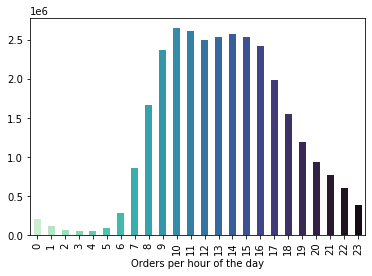

In [60]:
# Create bar chart for 'order_hour_of_day'

bar_hour_of_day = df_10RC['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 24))
plt.xlabel('Orders per hour of the day')

In [61]:
# Export bar chart

bar_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hour_of_day.png'))

Text(108.68, 0.5, '')

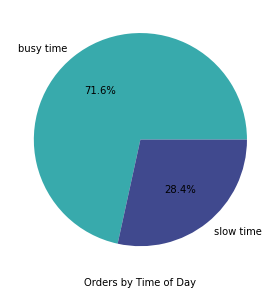

In [32]:
# Create pie chart for 'busy_tod'

pie_ords_tod = df_10RC['busy_tod'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 2))
plt.tight_layout()
plt.xlabel('Orders by Time of Day')
plt.ylabel('')

In [33]:
# Export pie chart

pie_ords_tod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_ords_tod.png'))

:: Day of the week

In [38]:
# Create day of week name column

df_10RC.loc[df_10RC['orders_day_of_week'] == 0, 'day_name'] = 'saturday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 1, 'day_name'] = 'sunday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 2, 'day_name'] = 'monday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 3, 'day_name'] = 'tuesday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 4, 'day_name'] = 'wednesday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 5, 'day_name'] = 'thursday'
df_10RC.loc[df_10RC['orders_day_of_week'] == 6, 'day_name'] = 'friday'


/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/Users/chrisherin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [39]:
# Check 'day_name' column

df_10RC['day_name'].value_counts()

saturday     5913988
sunday       5417154
friday       4295043
thursday     4037411
monday       4028561
tuesday      3673006
wednesday    3628326
Name: day_name, dtype: int64

In [40]:
df_10RC['day_name'].value_counts().to_clipboard()

Text(0.5, 0, 'Orders per day of the week')

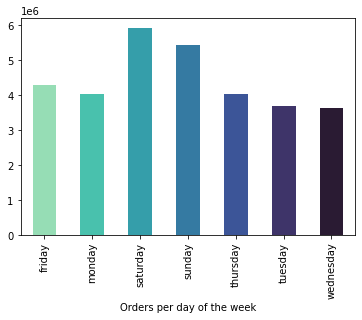

In [64]:
# Create bar chart for 'orders_day_of_week'

bar_dow = df_10RC['day_name'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 7))
plt.xlabel('Orders per day of the week')

In [65]:
# Export bar chart

bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_of_week.png'))

:: Price Range

Text(0, 0.5, '')

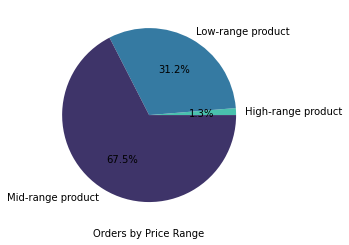

In [55]:
# Create pie chart for 'busy_tod'

pie_price_range = df_10RC['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 3))
plt.xlabel('Orders by Price Range')
plt.ylabel('')

In [56]:
# Export pie chart

pie_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range.png'))

:: Loyalty

Text(0, 0.5, '')

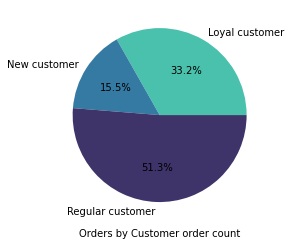

In [19]:
# Create pie chart for 'loyalty'

pie_loyalty = df_10RC['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 3))
plt.xlabel('Orders by Customer order count')
plt.ylabel('')

In [21]:
# Export pie chart

pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_loyalty.png'))

In [41]:
# Loyalty details

df_10RC['loyalty_flag'].value_counts()

Regular customer    15891507
Loyal customer      10294027
New customer         4807955
Name: loyalty_flag, dtype: int64

In [42]:
df_10RC['loyalty_flag'].value_counts().to_clipboard()

:: Regional 

Text(0, 0.5, '')

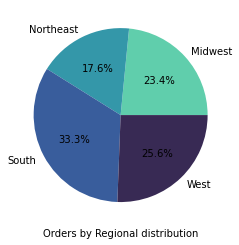

In [33]:
# Create pie chart for 'region'

pie_region = df_10RC['region'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('mako_r', 4))
plt.xlabel('Orders by Regional distribution')
plt.ylabel('')

In [34]:
# Export pie chart

pie_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_region.png'))

Text(0.5, 0, 'Orders per Regional distribution')

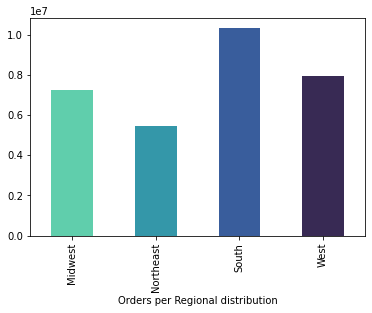

In [35]:
# Create bar chart for 'region'

bar_region = df_10RC['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('mako_r', 4))
plt.xlabel('Orders per Regional distribution')

In [36]:
# Export bar chart

bar_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region.png'))

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

:: Age - expenditure and frequency

In [43]:
# Expenditure by age group

expenditure_age = df_10RC.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [44]:
# Check

expenditure_age

prices           
               mean  min   max
age_group                     
18-20      7.794831  1.0  25.0
21-30      7.777369  1.0  25.0
31-40      7.790979  1.0  25.0
41-50      7.799890  1.0  25.0
51-60      7.781205  1.0  25.0
61-70      7.799809  1.0  25.0
71-80      7.791797  1.0  25.0
80+        7.803464  1.0  25.0

In [47]:
# Export to xls

expenditure_age.to_clipboard()

In [48]:
# Frequency by age group 

frequency_age = df_10RC.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [49]:
# Check

frequency_age

days_since_prior_order           
                            mean  min   max
age_group                                  
18-20                  10.879727  0.0  30.0
21-30                  10.826257  0.0  30.0
31-40                  10.780001  0.0  30.0
41-50                  10.797482  0.0  30.0
51-60                  10.855066  0.0  30.0
61-70                  10.777195  0.0  30.0
71-80                  10.802299  0.0  30.0
80+                    10.838324  0.0  30.0

In [50]:
# Export to xls

frequency_age.to_clipboard()

:: Marital Status - expenditure and frequency

In [51]:
# Expenditure by marital status

expenditure_maritalstatus = df_10RC.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

In [52]:
# Check

expenditure_maritalstatus

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.801016  1.0  25.0
living with parents and siblings  7.800604  1.0  25.0
married                           7.790278  1.0  25.0
single                            7.783597  1.0  25.0

In [53]:
# Export to xls

expenditure_maritalstatus.to_clipboard()

In [54]:
# Frequency by marital status

frequency_maritalstatus = df_10RC.groupby('marital_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [55]:
# Check

frequency_maritalstatus

days_since_prior_order           
                                                   mean  min   max
marital_status                                                    
divorced/widowed                              10.750595  0.0  30.0
living with parents and siblings              10.750737  0.0  30.0
married                                       10.821062  0.0  30.0
single                                        10.813127  0.0  30.0

In [56]:
# Export to xls

frequency_maritalstatus.to_clipboard()

:: Parental Status - expenditure and frequency

In [57]:
# Expenditure by parental status

expenditure_parentalstatus = df_10RC.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [58]:
# Check

expenditure_parentalstatus

prices           
                     mean  min   max
parental_status                     
non-parent       7.789550  1.0  25.0
parent           7.790937  1.0  25.0

In [59]:
# Export to xls

expenditure_parentalstatus.to_clipboard()

In [60]:
# Frequency by parental status

frequency_parentalstatus = df_10RC.groupby('parental_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [61]:
# Check

frequency_parentalstatus

days_since_prior_order           
                                  mean  min   max
parental_status                                  
non-parent                   10.791750  0.0  30.0
parent                       10.816574  0.0  30.0

In [62]:
# Export to xls

frequency_parentalstatus.to_clipboard()

:: Income - expenditure and frequency

In [63]:
# Expenditure by income bracket

expenditure_incomeb = df_10RC.groupby('income_b').agg({'prices': ['mean', 'min', 'max']})

In [64]:
# Check

expenditure_incomeb

prices           
                   mean  min   max
income_b                          
025000-050000  6.707347  1.0  25.0
050000-075000  7.819748  1.0  25.0
075000-100000  7.956828  1.0  25.0
100000-125000  7.956571  1.0  25.0
125000-150000  7.960370  1.0  25.0
150000+        7.940856  1.0  25.0

In [65]:
# Export to xls

expenditure_incomeb.to_clipboard()

In [66]:
# Frequency by income bracket

frequency_incomeb = df_10RC.groupby('income_b').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [67]:
# Check

frequency_incomeb

days_since_prior_order           
                                mean  min   max
income_b                                       
025000-050000              11.175680  0.0  30.0
050000-075000              10.760578  0.0  30.0
075000-100000              10.763394  0.0  30.0
100000-125000              10.790618  0.0  30.0
125000-150000              10.818219  0.0  30.0
150000+                    10.684130  0.0  30.0

In [68]:
# Export to xls

frequency_incomeb.to_clipboard()

:: Department - expenditure and frequency

In [69]:
# Expenditure by department

expenditure_dept = df_10RC.groupby('dept_name').agg({'prices': ['mean', 'min', 'max']})

In [70]:
# Check

expenditure_dept

prices           
                      mean  min   max
dept_name                            
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.336374  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733724  1.0  15.0
households        7.379943  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980349  1.0  15.0
snacks            4.275555  1.6   7.0

In [71]:
# Export to xls

expenditure_dept.to_clipboard()

In [72]:
# Frequency by department

frequency_dept = df_10RC.groupby('dept_name').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [73]:
# Check

frequency_dept

days_since_prior_order           
                                  mean  min   max
dept_name                                        
alcohol                      10.006658  0.0  30.0
babies                        9.780844  0.0  30.0
bakery                       10.808401  0.0  30.0
beverages                    10.768469  0.0  30.0
breakfast                    11.001313  0.0  30.0
bulk                          9.880211  0.0  30.0
canned goods                 11.316872  0.0  30.0
dairy eggs                   10.709201  0.0  30.0
deli                         11.051389  0.0  30.0
dry goods pasta              11.440362  0.0  30.0
frozen                       11.413880  0.0  30.0
households                   11.649305  0.0  30.0
international                10.963731  0.0  30.0
meat seafood                 11.123647  0.0  30.0
missing                       9.869551  0.0  30.0
other                        10.624647  0.0  30.0
pantry                       10.835976  0.0  30.0
personal care                11.256240  0.0  30.0
pets                         11.593531  0.0  30.0
produce                      10.574118  0.0  30.0
snacks                       10.671110  0.0  30.0

In [74]:
# Export to xls

frequency_dept.to_clipboard()

:: Day of the week - expenditure and frequency

In [75]:
# Expenditure by day of the week

expenditure_dow = df_10RC.groupby('day_name').agg({'prices': ['mean', 'min', 'max']})

In [76]:
# Check

expenditure_dow

prices           
               mean  min   max
day_name                      
friday     7.857788  1.0  25.0
monday     7.754532  1.0  25.0
saturday   7.857898  1.0  25.0
sunday     7.757879  1.0  25.0
thursday   7.761342  1.0  25.0
tuesday    7.757220  1.0  25.0
wednesday  7.756521  1.0  25.0

In [77]:
# Export to xls

expenditure_dow.to_clipboard()

In [78]:
# Frequency by day of the week

frequency_dow = df_10RC.groupby('day_name').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [79]:
# Check

frequency_dow

days_since_prior_order           
                            mean  min   max
day_name                                   
friday                 10.977273  0.0  30.0
monday                 10.984219  0.0  30.0
saturday               11.314877  0.0  30.0
sunday                 11.004176  0.0  30.0
thursday               10.176869  0.0  30.0
tuesday                10.572520  0.0  30.0
wednesday              10.262039  0.0  30.0

In [80]:
# Export to xls

frequency_dow.to_clipboard()

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

:: Bar chart - dept/parental

In [102]:
# Create crosstab for 'dept_name' and 'parental_status'

ct_parentals_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['parental_status'], dropna = False)

Text(0.5, 0, 'Departmental sales by Parental Status')

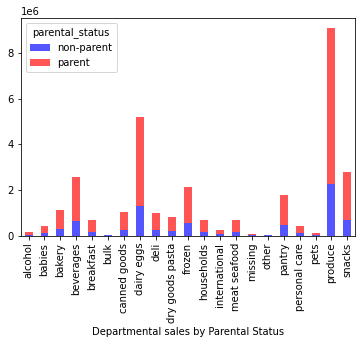

In [103]:
# Create stacked bar for 'ct_parentals_dept'

bar_parentS_dept = ct_parentals_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 2))
plt.xlabel('Departmental sales by Parental Status')

In [104]:
# Export bar chart

bar_parentS_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Parental.png'))

:: Bar chart - dept/marital

In [81]:
# Create crosstab for 'dept_name' and 'marital_status'

ct_marital_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['marital_status'], dropna = False)

Text(0.5, 0, 'Departmental sales per Marital Status')

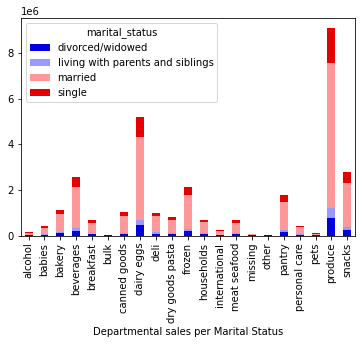

In [106]:
# Create stacked bar for 'ct_marital_dept'

bar_maritalS_dept = ct_marital_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 4))
plt.xlabel('Departmental sales per Marital Status')

In [58]:
ct_marital_dept

marital_status,divorced/widowed,living with parents and siblings,married,single
dept_name,,,,
alcohol,11859,8379,99421,24968
babies,34351,19381,287683,68977
bakery,95735,53684,785749,185660
beverages,220879,119107,1807453,424462
breakfast,56590,33198,471220,109842
bulk,2676,1633,23818,5324
canned goods,84268,48477,712577,166752
dairy eggs,442602,250207,3632600,851774
deli,86749,48119,702333,166633


In [82]:
ct_marital_dept.to_clipboard()

In [107]:
# Export bar chart

bar_maritalS_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Marital.png'))

:: Bar chart - dept/age

In [83]:
# Create crosstab for 'dept_name' and 'age'

ct_age_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['age_group'], dropna = False)

Text(0.5, 0, 'Departmental sales by Age')

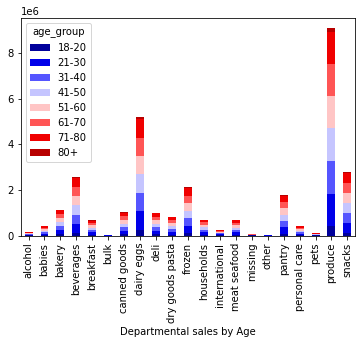

In [109]:
# Create stacked bar for 'ct_age_dept'

bar_age_dept = ct_age_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 8))
plt.xlabel('Departmental sales by Age')

In [55]:
ct_age_dept

age_group,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
dept_name,,,,,,,,
alcohol,8283,22152,23376,22677,22511,21597,21973,2058
babies,19831,64239,63594,67659,62050,63492,63029,6498
bakery,51629,175966,174903,176985,175328,172308,176150,17559
beverages,117392,401849,396168,404575,407230,396559,408118,40010
breakfast,32020,105615,104399,106368,104909,101673,104826,11040
bulk,1595,5365,5143,5426,4993,5213,5213,503
canned goods,47597,160647,157578,158032,158735,156506,157276,15703
dairy eggs,243669,812607,816071,818885,798006,795372,812161,80412
deli,46805,156948,157619,157389,156106,156166,157292,15509


In [84]:
ct_age_dept.to_clipboard()

In [110]:
# Export bar chart

bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Age.png'))

:: Bar chart - dept/income

In [111]:
# Create crosstab for 'dept_name' and 'income'

ct_income_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['income_b'], dropna = False)

Text(0.5, 0, 'Departmental sales by Income')

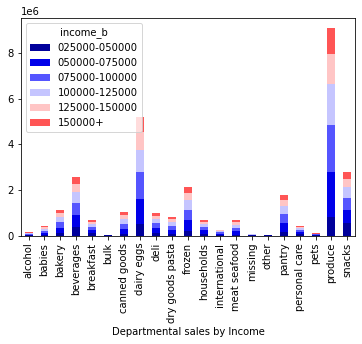

In [112]:
# Create stacked bar for 'ct_income_dept'

bar_income_dept = ct_income_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 8))
plt.xlabel('Departmental sales by Income')

In [113]:
# Export bar chart

bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Income.png'))

:: Bar chart - dept/orders day of week

In [85]:
# Create crosstab for 'dept_name' and 'orders_day_of_week'

ct_dow_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['day_name'], dropna = False)

Text(0.5, 0, 'Departmental sales by Day Of The Week')

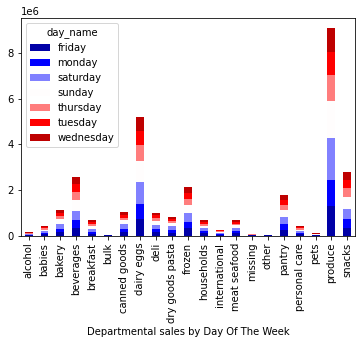

In [115]:
# Create stacked bar for 'ct_dow_dept'

bar_dow_dept = ct_dow_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 7))
plt.xlabel('Departmental sales by Day Of The Week')

In [86]:
ct_dow_dept

day_name,friday,monday,saturday,sunday,thursday,tuesday,wednesday
dept_name,,,,,,,
alcohol,18004,19223,16176,19400,25812,21197,24815
babies,55245,54979,78926,70692,49870,50731,49949
bakery,155650,145113,214438,194647,146926,132682,131372
beverages,325004,355499,412091,462953,360712,329897,325745
breakfast,85070,90631,119516,122583,89639,82367,81044
bulk,4556,4406,5921,6137,4471,4104,3856
canned goods,155119,125389,216023,170213,122702,112978,109650
dairy eggs,704531,677539,971292,916406,684160,613619,609636
deli,138682,129217,199582,176457,128893,116505,114498


In [87]:
ct_dow_dept.to_clipboard()

In [116]:
# Export bar chart

bar_dow_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_DOW.png'))

:: Bar chart - dept/busy_tod

In [88]:
# Create crosstab for 'dept_name' and 'busy_tod'

ct_tod_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['busy_tod'], dropna = False)

Text(0.5, 0, 'Departmental sales by Hour of Day')

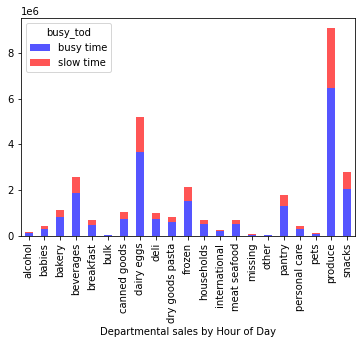

In [38]:
# Create stacked bar for 'ct_tod_dept'

bar_tod_dept = ct_tod_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 2))
plt.xlabel('Departmental sales by Hour of Day')

In [89]:
ct_tod_dept

busy_tod,busy time,slow time
dept_name,,
alcohol,114473,30154
babies,276440,133952
bakery,805610,315218
beverages,1872429,699472
breakfast,474970,195880
bulk,23798,9653
canned goods,734269,277805
dairy eggs,3684115,1493068
deli,724163,279671


In [90]:
ct_tod_dept.to_clipboard()

In [39]:
# Export bar chart

bar_tod_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_TOD.png'))

:: Bar chat - dept/price groups

In [91]:
# Create crosstab for 'dept_name' and 'busy_tod'

ct_Pgroup_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['price_range_loc'], dropna = False)

Text(0.5, 0, 'Departmental sales by Price Range')

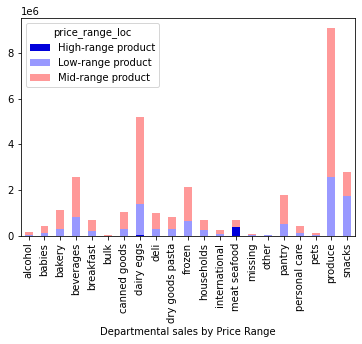

In [50]:
# Create stacked bar for 'ct_tod_dept'

bar_Pgroup_dept = ct_Pgroup_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 4))
plt.xlabel('Departmental sales by Price Range')

In [92]:
df_10RC['price_range_loc'].value_counts()

Mid-range product     20891775
Low-range product      9674842
High-range product      397953
Name: price_range_loc, dtype: int64

In [93]:
df_10RC['price_range_loc'].value_counts().to_clipboard()

In [51]:
# Export bar chart

bar_Pgroup_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Price_Range.png'))

:: Bar chart - dept/loyalty

In [94]:
# Create crosstab for 'dept_name' and 'loyalty_flag'

ct_loyalty_dept = pd.crosstab(df_10RC['dept_name'], df_10RC['loyalty_flag'], dropna = False)

Text(0.5, 0, 'Departmental sales by Loyalty')

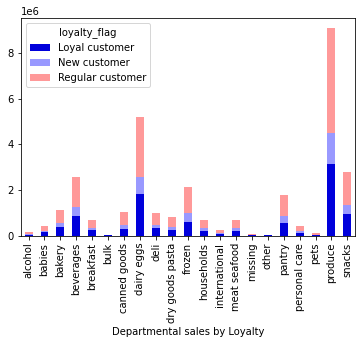

In [25]:
# Create stacked bar for 'ct_loaylty_dept'

bar_loyalty_dept = ct_loyalty_dept.plot(kind = 'bar', stacked = True, color = sns.color_palette('seismic', 4))
plt.xlabel('Departmental sales by Loyalty')

In [95]:
ct_loyalty_dept

loyalty_flag,Loyal customer,New customer,Regular customer
dept_name,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750057,2596419
deli,324046,158335,521453


In [96]:
ct_loyalty_dept.to_clipboard()

In [26]:
# Export bar chart

bar_loyalty_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_DeptSales_by_Loyalty.png'))

:: Bar chart - region/parental

In [97]:
# Create crosstab for 'region' and 'parental_status'

ct_region_parentalS = pd.crosstab(df_10RC['region'], df_10RC['parental_status'], dropna = False)

Text(0.5, 0, 'Regional sales by Parental Status')

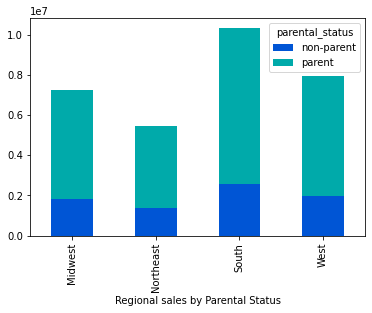

In [118]:
# Create stacked bar for 'ct_region_parentalS'

bar_region_parentalS = ct_region_parentalS.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 2))
plt.xlabel('Regional sales by Parental Status')

In [98]:
ct_region_parentalS

parental_status,non-parent,parent
region,,
Midwest,1824511,5443391
Northeast,1355842,4114322
South,2584479,7736352
West,1982351,5952241


In [99]:
ct_region_parentalS.to_clipboard()

In [119]:
# Export bar chart

bar_region_parentalS.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_ParentalS.png'))

:: Bar chart - region/marital status

In [100]:
# Create crosstab for 'region' and 'marital_status'

ct_region_maritalS = pd.crosstab(df_10RC['region'], df_10RC['marital_status'], dropna = False)

Text(0.5, 0, 'Regional sales by Marital Status')

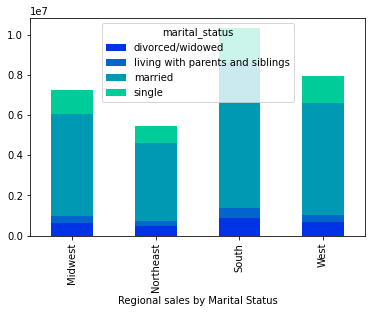

In [121]:
# Create stacked bar for 'ct_region_maritalS'

bar_region_maritalS = ct_region_maritalS.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 4))
plt.xlabel('Regional sales by Marital Status')

In [101]:
ct_region_maritalS

marital_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,617718,351719,5091672,1206793
Northeast,479247,256791,3857531,876595
South,878059,505953,7230399,1706420
West,672775,368258,5583983,1309576


In [102]:
ct_region_maritalS.to_clipboard()

In [122]:
# Export bar chart

bar_region_maritalS.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_MaritalS.png'))

:: Bar chart - region/age

In [103]:
# Create crosstab for 'region' and 'age'

ct_region_age = pd.crosstab(df_10RC['region'], df_10RC['age_group'], dropna = False)

Text(0.5, 0, 'Regional sales by Age Group')

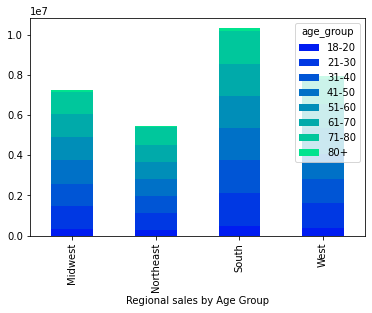

In [124]:
# Create stacked bar for 'ct_region_age'

bar_region_age = ct_region_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 8))
plt.xlabel('Regional sales by Age Group')

In [104]:
ct_region_age

age_group,18-20,21-30,31-40,41-50,51-60,61-70,71-80,80+
region,,,,,,,,
Midwest,340519,1121782,1131361,1178495,1137101,1125492,1107944,125208
Northeast,253759,858967,843145,853805,849720,860579,870865,79324
South,494536,1634474,1649493,1593364,1584636,1585411,1627847,151070
West,367327,1238930,1224505,1247382,1268354,1213050,1244300,130744


In [105]:
ct_region_age.to_clipboard()

In [125]:
# Export bar chart

bar_region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_AgeGroup.png'))

:: Bar chart - region/income

In [106]:
# Create crosstab for 'region' and 'income_b'

ct_region_income = pd.crosstab(df_10RC['region'], df_10RC['income_b'], dropna = False)

Text(0.5, 0, 'Regional sales by Income Bracket')

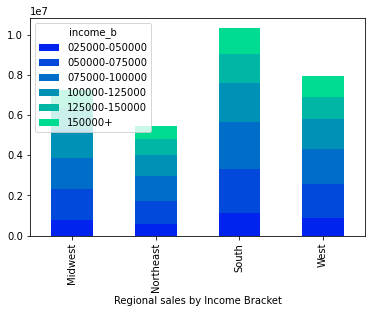

In [127]:
# Create stacked bar for 'ct_region_income'

bar_region_income = ct_region_income.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 6))
plt.xlabel('Regional sales by Income Bracket')

In [107]:
ct_region_income

income_b,025000-050000,050000-075000,075000-100000,100000-125000,125000-150000,150000+
region,,,,,,
Midwest,784531,1518197,1562338,1429662,1055409,917765
Northeast,587849,1143883,1219504,1044104,796515,678309
South,1143924,2173292,2335996,1945861,1430172,1291586
West,849915,1715070,1739544,1514337,1105314,1010412


In [108]:
ct_region_income.to_clipboard()

In [128]:
# Export bar chart

bar_region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_IncomeBracket.png'))

:: Bar chart - region/orders day of week

In [109]:
# Create crosstab for 'region' and 'orders_day_of_week'

ct_region_dow = pd.crosstab(df_10RC['region'], df_10RC['day_name'], dropna = False)

Text(0.5, 0, 'Regional sales by Day Of The Week')

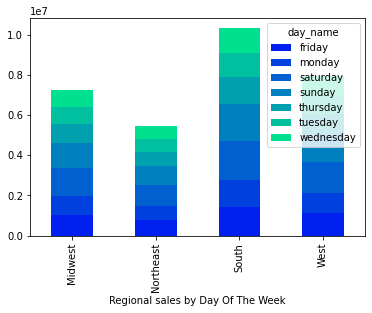

In [130]:
# Create stacked bar for 'ct_region_dow'

bar_region_dow = ct_region_dow.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 7))
plt.xlabel('Regional sales by Day Of The Week')

In [110]:
ct_region_dow

day_name,friday,monday,saturday,sunday,thursday,tuesday,wednesday
region,,,,,,,
Midwest,1010849,948256,1391320,1264934,944149,856121,852273
Northeast,750972,713881,1044767,955298,716876,649944,638426
South,1431050,1341639,1957145,1810174,1344138,1230124,1206561
West,1102172,1024785,1520756,1386748,1032248,936817,931066


In [111]:
ct_region_dow.to_clipboard()

In [131]:
# Export bar chart

bar_region_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_DOW.png'))

:: Bar chart - region/spending flag

In [112]:
# Create crosstab for 'region' and 'spending_flag'

ct_region_spending = pd.crosstab(df_10RC['region'], df_10RC['spending_flag'], dropna = False)

Text(0.5, 0, 'Regional sales by Spending flag')

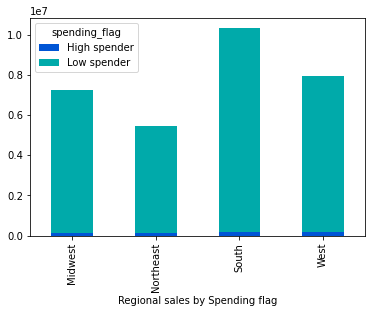

In [39]:
# Create stacked bar for 'ct_region_dow'

bar_region_spending = ct_region_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('winter', 2))
plt.xlabel('Regional sales by Spending flag')

In [113]:
ct_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,148784,7119118
Northeast,103163,5367001
South,199511,10121320
West,152371,7782221


In [114]:
ct_region_spending.to_clipboard()

In [40]:
# Export bar chart

bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_RegionalSales_by_Spendingflag.png'))

:: Bar chart - age/loyalty

In [115]:
# Create crosstab for 'age' and 'loyalty_flag'

ct_age_loyalty = pd.crosstab(df_10RC['age_group'], df_10RC['loyalty_flag'], dropna = False)

Text(0.5, 0, 'Loyalty Flag by Age Group')

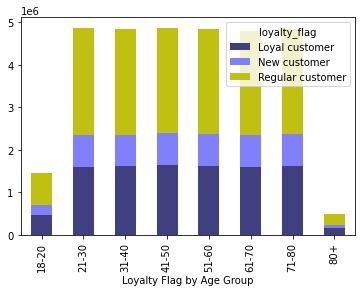

In [35]:
# Create stacked bar for 'ct_age_loyalty'

bar_age_loyalty = ct_age_loyalty.plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_stern', 3))
plt.xlabel('Loyalty Flag by Age Group')

In [116]:
ct_age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
18-20,466820,226651,762670
21-30,1594308,755798,2504047
31-40,1616651,733566,2498287
41-50,1637961,752783,2482302
51-60,1610677,758537,2470597
61-70,1596773,753957,2433802
71-80,1613163,750190,2487603
80+,157674,76473,252199


In [117]:
ct_age_loyalty.to_clipboard()

In [36]:
# Export bar chart

bar_age_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_loyalty.png'))

:: Bar chart - gender/loyalty

In [118]:
# Create crosstab for 'gender' and 'loyalty_flag'

ct_loyalty_gender = pd.crosstab(df_10RC['loyalty_flag'], df_10RC['gender'], dropna = False)

Text(0.5, 0, 'Loyalty Flag by Gender')

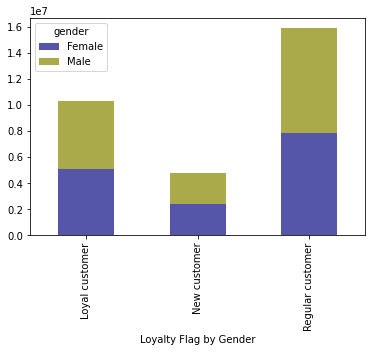

In [46]:
# Create stacked bar for 'ct_loyalty_gender'

bar_loyalty_gender = ct_loyalty_gender.plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_stern', 2))
plt.xlabel('Loyalty Flag by Gender')

In [119]:
ct_loyalty_gender

gender,Female,Male
loyalty_flag,,
Loyal customer,5108126,5185901
New customer,2387489,2420466
Regular customer,7896768,7994739


In [120]:
ct_loyalty_gender.to_clipboard()

In [47]:
ct_loyalty_gender

gender,Female,Male
loyalty_flag,,
Loyal customer,5108126,5185901
New customer,2387489,2420466
Regular customer,7896768,7994739


In [48]:
# Export bar chart

bar_loyalty_gender.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_gender.png'))

:: Bar chart - loyalty/price_range

In [121]:
# Create crosstab for 'gender' and 'price_range'

ct_loyalty_price = pd.crosstab(df_10RC['loyalty_flag'], df_10RC['price_range_loc'], dropna = False)

Text(0.5, 0, 'Loyalty Flag by Price Range')

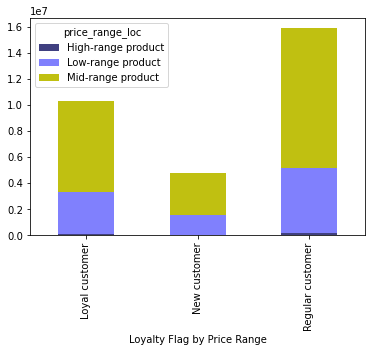

In [52]:
# Create stacked bar for 'ct_loyalty_price'

bar_loyalty_price = ct_loyalty_price.plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_stern', 3))
plt.xlabel('Loyalty Flag by Price Range')

In [122]:
ct_loyalty_price

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501290,3236484
Regular customer,212090,4958862,10705824


In [123]:
ct_loyalty_price.to_clipboard()

In [54]:
ct_loyalty_price

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501290,3236484
Regular customer,212090,4958862,10705824


In [55]:
# Export bar chart

bar_loyalty_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_price.png'))

:: Bar chart - marital status/age

In [124]:
# Create crosstab for 'marital_status' and 'age_group'

ct_marital_age = pd.crosstab(df_10RC['age_group'], df_10RC['marital_status'], dropna = False)

In [46]:
ct_marital_age

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
18-20,0,1110955,0,345186
21-30,0,371766,3252623,1229764
31-40,0,0,3640634,1207870
41-50,0,0,3672601,1200445
51-60,112225,0,3611467,1116119
61-70,1210482,0,3574050,0
71-80,1186748,0,3664208,0
80+,138344,0,348002,0


In [125]:
ct_marital_age.to_clipboard()

Text(0.5, 0, 'Marital Status by Age Group')

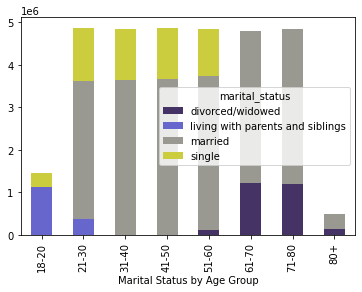

In [51]:
# Create stacked bar for 'ct_marital_age'

bar_marital_age = ct_marital_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('gist_stern', 4))
plt.xlabel('Marital Status by Age Group')

In [52]:
# Export bar chart

bar_marital_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_marital_age.png'))

9. Final notes: Remaining variables for analysis as needed. 
- Frequency flag (specifically number of purchases per customer, in categories)
- Gender

10. Exports

In [132]:
# Export amended df_10RC

df_10RC.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Insta_Final.pkl'))